In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import optuna
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate
import os

# Data Preprocessing & EDA

In [2]:
train=pd.read_csv('./Train_data.csv')
test=pd.read_csv('./Test_data.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [4]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


## Missing Data

In [7]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

## Duplicates 

In [8]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


In [12]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='class', ylabel='count'>

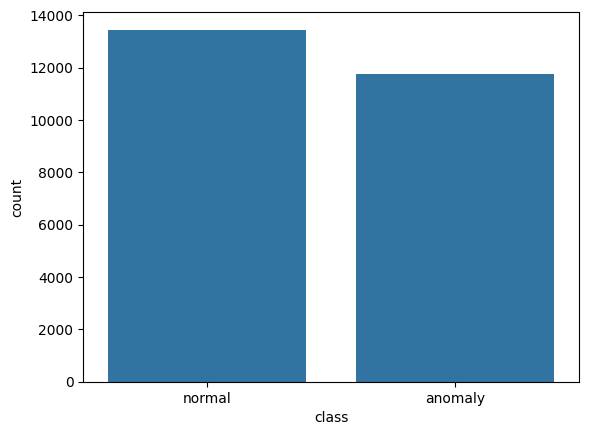

In [13]:
sns.countplot(x=train['class'])

# Label Encoding

In [14]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [15]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


# Feature selection

In [16]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [17]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [18]:
X_train = X_train[selected_features]

# Split and scale data

In [ ]:
# Apply feature selection to test data as well
test = test[selected_features]

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.transform(test)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

# K Nearest Neighbors (KNN) classification model

In [21]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [22]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

[I 2025-12-24 11:10:44,653] A new study created in memory with name: no-name-d335d137-4e1c-496b-ae26-6b4e2d0c9c27
[I 2025-12-24 11:10:47,150] Trial 0 finished with value: 0.9820058216459381 and parameters: {'KNN_n_neighbors': 4}. Best is trial 0 with value: 0.9820058216459381.


FrozenTrial(number=0, state=<TrialState.COMPLETE: 1>, values=[0.9820058216459381], datetime_start=datetime.datetime(2025, 12, 24, 11, 10, 44, 656971), datetime_complete=datetime.datetime(2025, 12, 24, 11, 10, 47, 150415), params={'KNN_n_neighbors': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [23]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9881478961097879
Test Score: 0.9820058216459381


# Decision Tree Classifier

In [24]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [25]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

[I 2025-12-24 11:11:28,588] A new study created in memory with name: no-name-1386418c-31bf-4e83-9788-39d19f434878
[I 2025-12-24 11:11:29,145] Trial 0 finished with value: 0.9941783540619211 and parameters: {'dt_max_depth': 12, 'dt_max_features': 7}. Best is trial 0 with value: 0.9941783540619211.
[I 2025-12-24 11:11:29,876] Trial 1 finished with value: 0.9944429743318338 and parameters: {'dt_max_depth': 20, 'dt_max_features': 10}. Best is trial 1 with value: 0.9944429743318338.
[I 2025-12-24 11:11:30,580] Trial 2 finished with value: 0.9951045250066155 and parameters: {'dt_max_depth': 26, 'dt_max_features': 9}. Best is trial 2 with value: 0.9951045250066155.
[I 2025-12-24 11:11:30,788] Trial 3 finished with value: 0.9916644614977508 and parameters: {'dt_max_depth': 20, 'dt_max_features': 2}. Best is trial 2 with value: 0.9951045250066155.
[I 2025-12-24 11:11:31,632] Trial 4 finished with value: 0.9951045250066155 and parameters: {'dt_max_depth': 12, 'dt_max_features': 9}. Best is trial

FrozenTrial(number=14, state=<TrialState.COMPLETE: 1>, values=[0.9955014554114845], datetime_start=datetime.datetime(2025, 12, 24, 11, 11, 36, 303894), datetime_complete=datetime.datetime(2025, 12, 24, 11, 11, 36, 979677), params={'dt_max_depth': 15, 'dt_max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=14, value=None)


In [26]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 0.9999432913689463
Test Score: 0.9943106641968775


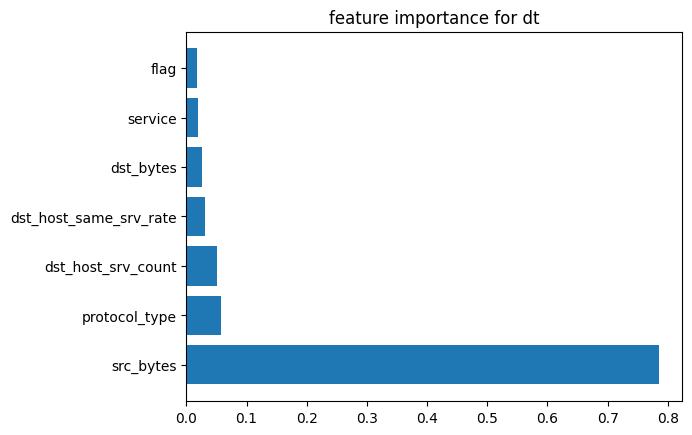

In [28]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(dt.feature_importances_), features_names, top=7)

# Random Forest Classifier

In [29]:
def objective(trial):
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=False)
    rf_max_features = trial.suggest_int('rf_max_features', 2, 10, log=False)
    rf_n_estimators = trial.suggest_int('rf_n_estimators', 3, 20, log=False)
    classifier_obj = RandomForestClassifier(max_features = rf_max_features, max_depth = rf_max_depth, n_estimators = rf_n_estimators)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [30]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective, n_trials=30)
print(study_rf.best_trial)

[I 2025-12-24 11:14:43,579] A new study created in memory with name: no-name-aa1a557e-f748-40df-aced-be57ff225de3
[I 2025-12-24 11:14:43,984] Trial 0 finished with value: 0.9964276263561789 and parameters: {'rf_max_depth': 24, 'rf_max_features': 6, 'rf_n_estimators': 10}. Best is trial 0 with value: 0.9964276263561789.
[I 2025-12-24 11:14:44,565] Trial 1 finished with value: 0.9958983858163535 and parameters: {'rf_max_depth': 28, 'rf_max_features': 6, 'rf_n_estimators': 18}. Best is trial 0 with value: 0.9964276263561789.
[I 2025-12-24 11:14:44,732] Trial 2 finished with value: 0.9957660756813972 and parameters: {'rf_max_depth': 30, 'rf_max_features': 5, 'rf_n_estimators': 6}. Best is trial 0 with value: 0.9964276263561789.
[I 2025-12-24 11:14:45,084] Trial 3 finished with value: 0.9960306959513099 and parameters: {'rf_max_depth': 27, 'rf_max_features': 3, 'rf_n_estimators': 16}. Best is trial 0 with value: 0.9964276263561789.
[I 2025-12-24 11:14:45,250] Trial 4 finished with value: 0.

FrozenTrial(number=13, state=<TrialState.COMPLETE: 1>, values=[0.9968245567610479], datetime_start=datetime.datetime(2025, 12, 24, 11, 14, 47, 736457), datetime_complete=datetime.datetime(2025, 12, 24, 11, 14, 48, 26121), params={'rf_max_depth': 13, 'rf_max_features': 4, 'rf_n_estimators': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'rf_max_features': IntDistribution(high=10, log=False, low=2, step=1), 'rf_n_estimators': IntDistribution(high=20, log=False, low=3, step=1)}, trial_id=13, value=None)


In [31]:
rf = RandomForestClassifier(max_features = study_rf.best_trial.params['rf_max_features'], max_depth = study_rf.best_trial.params['rf_max_depth'], n_estimators = study_rf.best_trial.params['rf_n_estimators'])
rf.fit(x_train, y_train)

rf_train, rf_test = rf.score(x_train, y_train), rf.score(x_test, y_test)

print(f"Train Score: {rf_train}")
print(f"Test Score: {rf_test}")

Train Score: 0.9997164568447318
Test Score: 0.9961630060862662


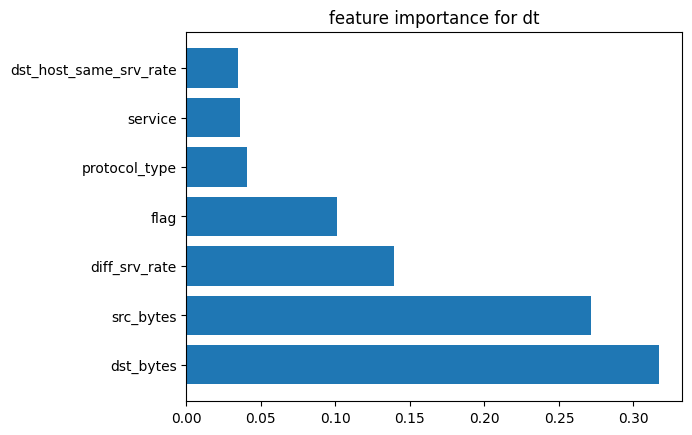

In [32]:
from matplotlib import pyplot as plt

def f_importance(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importance for dt')
    plt.show()

# whatever your features are called
features_names = selected_features

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importance(abs(rf.feature_importances_), features_names, top=7)

# SKLearn Gradient Boosting Model

In [33]:
SKGB = GradientBoostingClassifier(random_state=42)
SKGB.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [34]:
SKGB_train, SKGB_test = SKGB.score(x_train , y_train), SKGB.score(x_test , y_test)

print(f"Training Score: {SKGB_train}")
print(f"Test Score: {SKGB_test}")

Training Score: 0.9947828059430646
Test Score: 0.9927229425774015


# SVM Model

In [35]:
def objective(trial):
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'linearSVC'])
    c = trial.suggest_float('c', 0.02, 1.0, step=0.02)
    if kernel in ['linear', 'rbf']:
        classifier_obj = SVC(kernel=kernel, C=c).fit(x_train, y_train)
    elif kernel == 'linearSVC':
        classifier_obj = LinearSVC(C=c).fit(x_train, y_train)
    elif kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 10)
        classifier_obj = SVC(kernel=kernel, C=c, degree=degree).fit(x_train, y_train)
        
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [36]:
study_svm = optuna.create_study(direction='maximize')
study_svm.optimize(objective, n_trials=30)
print(study_svm.best_trial)

[I 2025-12-24 11:16:35,992] A new study created in memory with name: no-name-15a37a94-0073-4d70-917a-d69904749c28
[I 2025-12-24 11:16:44,293] Trial 0 finished with value: 0.9322572109023551 and parameters: {'kernel': 'linear', 'c': 0.66}. Best is trial 0 with value: 0.9322572109023551.
[I 2025-12-24 11:16:44,392] Trial 1 finished with value: 0.9269648055041017 and parameters: {'kernel': 'linearSVC', 'c': 0.04}. Best is trial 0 with value: 0.9322572109023551.
[I 2025-12-24 11:16:52,102] Trial 2 finished with value: 0.9464143953426832 and parameters: {'kernel': 'poly', 'c': 0.66, 'degree': 7}. Best is trial 2 with value: 0.9464143953426832.
[I 2025-12-24 11:17:04,035] Trial 3 finished with value: 0.9218047102408045 and parameters: {'kernel': 'poly', 'c': 0.78, 'degree': 8}. Best is trial 2 with value: 0.9464143953426832.
[I 2025-12-24 11:17:04,085] Trial 4 finished with value: 0.927097115639058 and parameters: {'kernel': 'linearSVC', 'c': 0.02}. Best is trial 2 with value: 0.946414395342

FrozenTrial(number=10, state=<TrialState.COMPLETE: 1>, values=[0.9708917703096057], datetime_start=datetime.datetime(2025, 12, 24, 11, 18, 16, 262078), datetime_complete=datetime.datetime(2025, 12, 24, 11, 18, 21, 660230), params={'kernel': 'rbf', 'c': 1.0}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf', 'poly', 'linearSVC')), 'c': FloatDistribution(high=1.0, log=False, low=0.02, step=0.02)}, trial_id=10, value=None)


In [37]:
if study_svm.best_trial.params['kernel'] in ['linear', 'rbf']:
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'])
elif kernel == 'linearSVC':
    SVM_model = LinearSVC(C=study_svm.best_trial.params['c'])
elif kernel == 'poly':
    SVM_model = SVC(kernel=study_svm.best_trial.params['kernel'], C=study_svm.best_trial.params['c'], degree=study_svm.best_trial.params['degree'])

SVM_model.fit(x_train, y_train)

SVC()

In [38]:
SVM_train, SVM_test = SVM_model.score(x_train , y_train), SVM_model.score(x_test , y_test)

print(f"Training Score: {SVM_train}")
print(f"Test Score: {SVM_test}")

Training Score: 0.9683565838720654
Test Score: 0.9708917703096057


# Summary

In [39]:
data = [["KNN", KNN_train, KNN_test],
        ["Decision Tree", dt_train, dt_test], 
        ["Random Forest", rf_train, rf_test], 
        ["GBM", SKGB_train, SKGB_test],
        ["SVM", SVM_train, SVM_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═══════════════╤═══════════════╤══════════════╕
│ Model         │   Train Score │   Test Score │
╞═══════════════╪═══════════════╪══════════════╡
│ KNN           │      0.988148 │     0.982006 │
├───────────────┼───────────────┼──────────────┤
│ Decision Tree │      0.999943 │     0.994311 │
├───────────────┼───────────────┼──────────────┤
│ Random Forest │      0.999716 │     0.996163 │
├───────────────┼───────────────┼──────────────┤
│ GBM           │      0.994783 │     0.992723 │
├───────────────┼───────────────┼──────────────┤
│ SVM           │      0.968357 │     0.970892 │
╘═══════════════╧═══════════════╧══════════════╛


# Save the Best Model

In [40]:
import joblib

# Determine the best model based on test scores
model_scores = {
    'KNN': KNN_test,
    'Decision Tree': dt_test,
    'Random Forest': rf_test,
    'GBM': SKGB_test,
    'SVM': SVM_test
}

best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]

print(f"Best Model: {best_model_name}")
print(f"Test Score: {best_model_score:.4f}")

# Select the best model object
if best_model_name == 'KNN':
    best_model = KNN_model
elif best_model_name == 'Decision Tree':
    best_model = dt
elif best_model_name == 'Random Forest':
    best_model = rf
elif best_model_name == 'GBM':
    best_model = SKGB
elif best_model_name == 'SVM':
    best_model = SVM_model

# Save the best model
model_path = './best_intrusion_detection_model.pkl'
joblib.dump(best_model, model_path)
print(f"Model saved to {model_path}")

Best Model: Random Forest
Test Score: 0.9962
Model saved to ./best_intrusion_detection_model.pkl


# Save Preprocessing Objects (Scaler and Selected Features)

In [ ]:
# Save the scaler and selected features for inference
joblib.dump(scale, './scaler.pkl')
joblib.dump(selected_features, './selected_features.pkl')

print("Scaler saved to ./scaler.pkl")
print("Selected features saved to ./selected_features.pkl")
print(f"Selected features: {selected_features}")

Scaler saved to ./scaler.pkl
Selected features saved to ./selected_features.pkl
Selected features: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


# Inference Code - Load Model and Make Predictions

In [42]:
# Load the saved model, scaler, and features
loaded_model = joblib.load('./best_intrusion_detection_model.pkl')
loaded_scaler = joblib.load('./scaler.pkl')
loaded_features = joblib.load('./selected_features.pkl')

print("Model loaded successfully!")
print(f"Model type: {type(loaded_model).__name__}")
print(f"Features to use: {loaded_features}")

Model loaded successfully!
Model type: RandomForestClassifier
Features to use: ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [ ]:
def predict_intrusion(data_point, model, scaler, features, label_encoders=None):
    """
    Make predictions on new data using the loaded model.
    
    Parameters:
    -----------
    data_point : pd.DataFrame or dict
        Input data with all required features. Can be raw data with categorical columns
        or preprocessed data (numeric only).
    model : sklearn model
        Loaded trained model
    scaler : StandardScaler
        Loaded scaler for preprocessing
    features : list
        List of selected features to use
    label_encoders : dict, optional
        Dictionary of LabelEncoders for categorical columns. If provided, will encode
        categorical features automatically.
    
    Returns:
    --------
    prediction : int
        Predicted class (0 or 1)
    probability : array or None
        Confidence score for each class
    """
    
    # If input is a dictionary, convert to DataFrame
    if isinstance(data_point, dict):
        data_point = pd.DataFrame([data_point])
    else:
        data_point = data_point.copy()
    
    # Apply label encoding if encoders are provided and data has object columns
    if label_encoders is not None:
        for col in data_point.columns:
            if data_point[col].dtype == 'object' and col in label_encoders:
                data_point[col] = label_encoders[col].transform(data_point[col])
    
    # Select only the required features
    data_selected = data_point[features]
    
    # Scale the data
    data_scaled = scaler.transform(data_selected)
    
    # Make prediction
    prediction = model.predict(data_scaled)[0]
    
    # Get probability/confidence if available
    if hasattr(model, 'predict_proba'):
        probability = model.predict_proba(data_scaled)[0]
    else:
        probability = None
    
    return prediction, probability

# Example: Test with a sample from already scaled data (easiest approach)
test_sample = pd.DataFrame(test[0:1], columns=selected_features)

prediction, probability = predict_intrusion(test_sample, loaded_model, loaded_scaler, loaded_features)

print(f"Prediction: {prediction}")
print(f"Prediction class: {'Normal' if prediction == 0 else 'Intrusion'}")
if probability is not None:
    print(f"Probability distribution: {probability}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- dst_host_count
- dst_host_diff_srv_rate
- dst_host_rerror_rate
- dst_host_same_src_port_rate
- dst_host_serror_rate
- ...


# Important: How to Use the Model for Inference

## Option 1: Using Already Preprocessed Data (Recommended)
If your input data is already label-encoded and has the correct features, use the method above.

## Option 2: Using Raw Data
To use raw data with categorical columns, you need to:
1. Load the original training data to fit label encoders
2. Or create label encoders during training and save them

For raw data inference, follow these steps:
- Read your test data CSV
- Apply label encoding to all object columns (same as training)
- Select only the features in `selected_features` list
- Pass to `predict_intrusion()` function

In [ ]:
# Example: Inference from raw CSV data
def predict_from_raw_data(csv_file_path, model, scaler, features):
    """
    Load data from CSV and make predictions.
    Assumes the CSV has the same columns as the training data (before feature selection).
    """
    # Read the CSV file
    raw_data = pd.read_csv(csv_file_path)
    
    # Apply label encoding to object columns (same as training)
    for col in raw_data.columns:
        if raw_data[col].dtype == 'object':
            label_encoder = LabelEncoder()
            raw_data[col] = label_encoder.fit_transform(raw_data[col])
    
    # Remove 'class' column if it exists
    if 'class' in raw_data.columns:
        raw_data = raw_data.drop(['class'], axis=1)
    
    # Select only the required features
    data_selected = raw_data[features]
    
    # Scale the data
    data_scaled = scaler.transform(data_selected)
    
    # Make predictions
    predictions = model.predict(data_scaled)
    
    if hasattr(model, 'predict_proba'):
        probabilities = model.predict_proba(data_scaled)
    else:
        probabilities = None
    
    return predictions, probabilities

# Uncomment below to test with your CSV file:
# predictions, probabilities = predict_from_raw_data('./Test_data.csv', loaded_model, loaded_scaler, loaded_features)
# print(f"Predictions: {predictions}")
# if probabilities is not None:
#     print(f"Probabilities:\n{probabilities}")